# Demo on fetching glider data from erddap-uncabled

First we import the libraries we need 

TODO: change paths once we have the package sorted

In [1]:
from fetchers import GliderDataFetcher, DatasetList
from erddapy import ERDDAP

Now we look for the glider datasets available

In [2]:
datasets = DatasetList()
datasets.e =  ERDDAP(
           server="https://erddap-uncabled.oceanobservatories.org/uncabled/erddap",
           protocol="tabledap",
)
glider_ids = datasets.get_ids()
glider_ids

0      CP05MOAS-GL336-02-FLORTM000-flort_m_glider_ins...
1      CP05MOAS-GL336-03-CTDGVM000-ctdgv_m_glider_ins...
2      CP05MOAS-GL336-03-CTDGVM000-ctdgv_m_glider_ins...
3      CP05MOAS-GL336-03-CTDGVM000-ctdgv_m_glider_ins...
4      CP05MOAS-GL336-03-CTDGVM000-ctdgv_m_glider_ins...
                             ...                        
401    CE07SHSM-RID26-07-NUTNRB000-nutnr_b_dcl_full_i...
402    CP01CNSM-RID26-07-NUTNRB000-nutnr_b_dcl_full_i...
403    GA01SUMO-RID16-07-NUTNRB000-nutnr_b_dcl_full_i...
404    CP03ISSM-RID26-07-NUTNRB000-nutnr_b_dcl_full_i...
405    CP04OSSM-RID26-07-NUTNRB000-nutnr_b_dcl_full_i...
Name: Dataset ID, Length: 406, dtype: object

We pick one of these datasets and pull the data

In [3]:
uncabled_grab = GliderDataFetcher()
uncabled_grab.fetcher =  ERDDAP(
            server="https://erddap-uncabled.oceanobservatories.org/uncabled/erddap",
            protocol="tabledap",
            response="csv",
        )
uncabled_grab.fetcher.dataset_id = glider_ids[0]

Now let's get that data

In [4]:
df = uncabled_grab.fetcher.to_pandas(
    index_col="time (UTC)",
    parse_dates=True,
    ).dropna()

df.head()

,latitude (degrees_north),longitude (degrees_east),trajectory,deployment,ctdgv_m_glider_instrument_practical_salinity (1),ctdgv_m_glider_instrument_sci_water_pressure_dbar (dbar),ctdgv_m_glider_instrument_sci_water_temp (deg_C),driver_timestamp (UTC),id,ingestion_timestamp (UTC),...,sci_flbbcd_bb_units_qc_results,sci_flbbcd_cdom_units (ppb),sci_flbbcd_cdom_units_qc_executed,sci_flbbcd_cdom_units_qc_results,sci_flbbcd_chlor_units (ug L-1),sci_flbbcd_chlor_units_qc_executed,sci_flbbcd_chlor_units_qc_results,sci_m_present_secs_into_mission (s),sci_m_present_time (UTC),seawater_scattering_coefficient (m-1)
time (UTC),,,,,,,,,,,,,,,,,,,,,
2017-08-17 12:17:58+00:00,39.922614,-70.867109,CP05MOAS-GL336-02-FLORTM000-flort_m_glider_ins...,5,0.000000,0.00,0.000000,2017-09-07T19:11:31Z,7c5b04ba-92bb-43a2-b5f9-73bf487fb222,2017-09-07T19:11:31Z,...,12,0.0000,29,29,0.0000,29,29,75.5368,2017-08-17T12:17:58Z,0.000505
2017-08-17 12:18:05+00:00,39.922261,-70.867184,CP05MOAS-GL336-02-FLORTM000-flort_m_glider_ins...,5,0.000000,0.00,0.000000,2017-09-07T19:11:31Z,165f74c1-1d8c-4fa5-bea7-1036790759f1,2017-09-07T19:11:31Z,...,12,0.0000,29,29,0.0000,29,29,82.3318,2017-08-17T12:18:05Z,0.000505
2017-08-17 12:19:05+00:00,39.921867,-70.867260,CP05MOAS-GL336-02-FLORTM000-flort_m_glider_ins...,5,33.531697,0.20,23.486900,2017-09-07T19:11:31Z,70e9ebfa-3052-40e0-b15d-25503970c47b,2017-09-07T19:11:31Z,...,12,1.1791,29,29,0.1656,29,29,142.9040,2017-08-17T12:19:05Z,0.000619
2017-08-17 12:20:06+00:00,39.921688,-70.867303,CP05MOAS-GL336-02-FLORTM000-flort_m_glider_ins...,5,33.533285,0.21,23.487101,2017-09-07T19:11:31Z,9c5a0a50-26db-452b-9bce-c9f7bb2d7e64,2017-09-07T19:11:31Z,...,12,1.6326,29,29,0.1872,29,29,203.1890,2017-08-17T12:20:06Z,0.000619
2017-08-17 12:21:06+00:00,39.921492,-70.867356,CP05MOAS-GL336-02-FLORTM000-flort_m_glider_ins...,5,33.533743,0.22,23.490000,2017-09-07T19:11:31Z,f828f7f6-dfd8-4074-86b6-b8585ed1e923,2017-09-07T19:11:31Z,...,12,1.6326,29,29,0.1440,29,29,263.4520,2017-08-17T12:21:06Z,0.000619


A quick plot of the data

In [5]:
import matplotlib.pyplot as plt

[(-100.0, 0.0)]

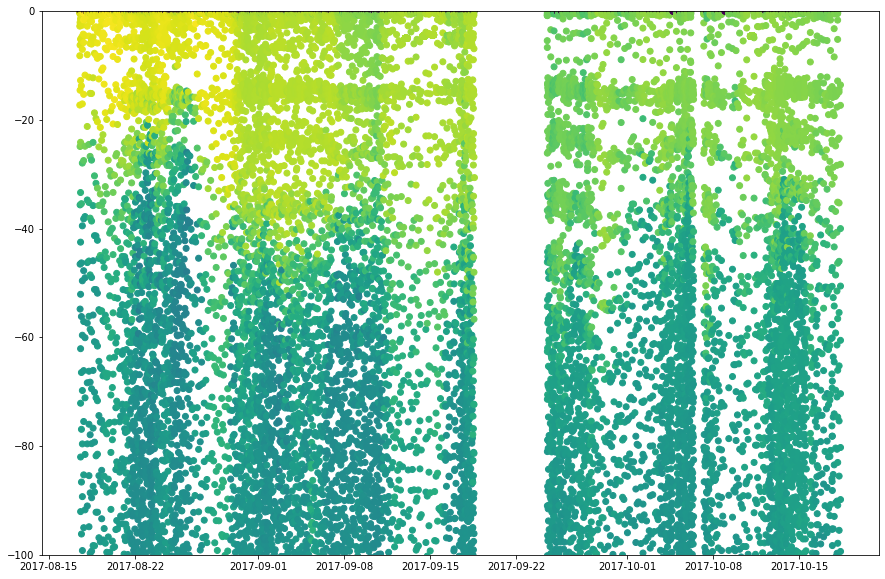

In [6]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(df.index, -df['ctdgv_m_glider_instrument_sci_water_pressure_dbar (dbar)'],
           c = df['ctdgv_m_glider_instrument_sci_water_temp (deg_C)'])
ax.set(ylim=(-100,0))

----------------------